# Unsupervised Learning: Practice Problems (with Solutions)

## Problem 1: Clustering Practice Problem

In this problem, we will be using data on mall shoppers to derive insights about consumer behavior at this mall.  

### Part 1: Visualize Data
Import the "Mall_Customers.csv" file and create a 3D plot of the data using age and income as predictor variables and spending score as the response variable. Does it look like there is any customer segmentation? What are some initial insights you are able to derive from this plot alone?

In [1]:
#Import packages: It is best practice to import all of your packages at the top of a code file.
#Periodically return to this cell to import additional packages (make sure to re-run the code too!)
#Hint: For this exercise, you will need pandas, os, matplotlib, a 3D plotting package (we use mpl_toolkits.mplot 3d), and sklearn

import pandas as pd
import os
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [2]:
#Set working directory to where your csv file is stored on your laptop
os.chdir(r'C:\Users\sarahansen\Documents\Python Training') #This path works for me, but will not for you! 
os.getcwd()

'C:\\Users\\sarahansen\\Documents\\Python Training'

In [3]:
#Import dataset as pandas dataframe
df_customer = pd.read_csv('Mall_Customers.csv')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


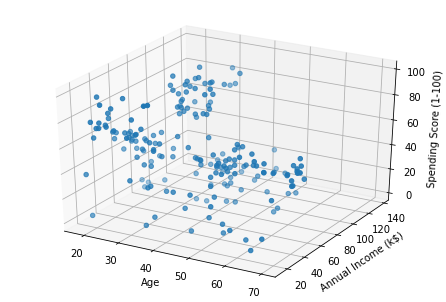

In [4]:
#Perform initial visualization of data to assess potential clusters
#Use Spending Score as the response variabe (z-axis) and Age/Annual Income (k$) on the x/y axes
#An option for packages include: matplotlib pyplot and Axes3D from mpl_toolkits.mplot3d
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df_customer['Age'],df_customer['Annual Income (k$)'],df_customer['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
pyplot.show()

In [5]:
#Does it look like there is any customer segmentation? What are some initial insights you are able to derive from this plot alone?
#No code here, just think about it.   

#It does look like there is some segmentation (exciting!) - particularly among young people with a large income.

### Part 2: K-Means Clustering
Use K-Means Clustering with k = 4 clusters on this dataset. Use the same predictor and response variables).

Re-create the 3D plot from Part 1, but put each cluster group in its own color. Can you derive any additional insights from Part 1?

In [6]:
#Create the subset of data to be used in clustering
#Make a new pandas dataframe using the Age, Annual Income, and Spending Score fields
df_customer_clust = df_customer[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_customer_clust.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
#Construct a kMeans cluster model using the cluster.KMeans function from Sklearn
kmeans_model = cluster.KMeans(n_clusters = 4).fit(df_customer_clust)
#Collect the labels using the ".labels_" attribute
#Apply the labels to the dataset by creating a new dataframe and appending the labels as their own column
df_customer_clust_labels = df_customer_clust[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_customer_clust_labels['cluster_labels'] = kmeans_model.labels_
df_customer_clust_labels.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,19,15,39,3
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


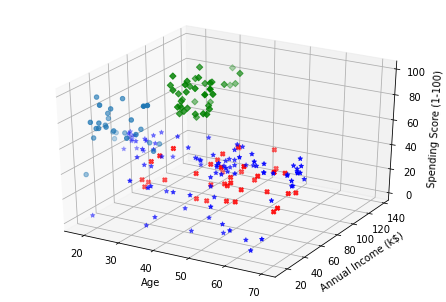

In [8]:
#Re-create the 3D visualization with the clusters color-coded.

#Use lambda functions to create a pandas dataframe for each cluster, based on the value in the cluster column.
#Then, use Axes3D to simultaneously visualize the clusters and assign colors to the data points.


fig = pyplot.figure()
ax = Axes3D(fig)

df_customer_clust_1 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 0]
df_customer_clust_2 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 1]
df_customer_clust_3 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 2]
df_customer_clust_4 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 3]

c1 = ax.scatter(df_customer_clust_1['Age'],df_customer_clust_1['Annual Income (k$)'],df_customer_clust_1['Spending Score (1-100)'],marker='X',color='r')
c2 = ax.scatter(df_customer_clust_2['Age'],df_customer_clust_2['Annual Income (k$)'],df_customer_clust_2['Spending Score (1-100)'],marker='D',color='g')
c3 = ax.scatter(df_customer_clust_3['Age'],df_customer_clust_3['Annual Income (k$)'],df_customer_clust_3['Spending Score (1-100)'],marker='*',color='b')
c4 = ax.scatter(df_customer_clust_4['Age'],df_customer_clust_4['Annual Income (k$)'],df_customer_clust_4['Spending Score (1-100)'])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

pyplot.show()

In [9]:
#Deriving additional insights from part 1:
#The young, high-income consumers are in their own cluster as high spenders as we observed on the first plot.
#However, we can now see a cluster of young people with low income who are high spenders as well.

### Part 3: Find Optimal Number of Clusters (K-Means)
Using the Silhouette score, determine the optimal number of clusters for k = 2 to k = 8. Re-run the k-means clustering model on using this optimal number and create a visualization of the result. What improved insights can be derived from the updated, optimal graph?

In [10]:
#Create a list containing the number of clusters from 2 to 8. 
#Loop through this list and run a k-means model on each.
#Calculate the Silhouette score for each model using the sklearn.metrics.silhouette_score function.
#Print each Silhouette value.

k_vals = [2,3,4,5,6,7,8]
for k in k_vals:
    kmeans_model = cluster.KMeans(n_clusters = k).fit(df_customer_clust)
    labels = kmeans_model.labels_
    print('Silhouette Score with k= {} clusters: '.format(k), silhouette_score(df_customer_clust,labels))

#Optimal k = 6 clusters

Silhouette Score with k= 2 clusters:  0.293166070535953
Silhouette Score with k= 3 clusters:  0.3839349967742105
Silhouette Score with k= 4 clusters:  0.40546302077733304
Silhouette Score with k= 5 clusters:  0.44428597560893024
Silhouette Score with k= 6 clusters:  0.4523443947724053
Silhouette Score with k= 7 clusters:  0.43883522027400007
Silhouette Score with k= 8 clusters:  0.42627498428462474


In [11]:
#Re-run clustering procedure with k=6 clusters, and create a dataframe of the data with cluster labels.
kmeans_model = cluster.KMeans(n_clusters = 6).fit(df_customer_clust)
df_customer_clust_labels = df_customer_clust[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_customer_clust_labels['cluster_labels'] = kmeans_model.labels_
df_customer_clust_labels.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


<ipython-input-12-6d3b244f3902>:13: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  c1 = ax.scatter(df_customer_clust_1['Age'],df_customer_clust_1['Annual Income (k$)'],df_customer_clust_1['Spending Score (1-100)'],marker='X',color='R')
<ipython-input-12-6d3b244f3902>:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  c2 = ax.scatter(df_customer_clust_2['Age'],df_customer_clust_2['Annual Income (k$)'],df_customer_clust_2['Spending Score (1-100)'],marker='D',color='G')
<ipython-input-12-6d3b244f3902>:15: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  c3 = ax.scatter(df_customer_clust_3['Age'],df_customer_clust_3['Annual Income (k$)

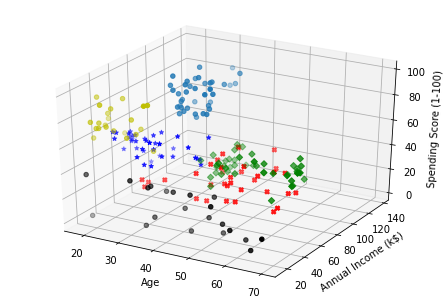

In [12]:
#Visualize Clusters

fig = pyplot.figure()
ax = Axes3D(fig)

df_customer_clust_1 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 0]
df_customer_clust_2 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 1]
df_customer_clust_3 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 2]
df_customer_clust_4 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 3]
df_customer_clust_5 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 4]
df_customer_clust_6 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 5]

c1 = ax.scatter(df_customer_clust_1['Age'],df_customer_clust_1['Annual Income (k$)'],df_customer_clust_1['Spending Score (1-100)'],marker='X',color='R')
c2 = ax.scatter(df_customer_clust_2['Age'],df_customer_clust_2['Annual Income (k$)'],df_customer_clust_2['Spending Score (1-100)'],marker='D',color='G')
c3 = ax.scatter(df_customer_clust_3['Age'],df_customer_clust_3['Annual Income (k$)'],df_customer_clust_3['Spending Score (1-100)'],marker='*',color='B')
c4 = ax.scatter(df_customer_clust_4['Age'],df_customer_clust_4['Annual Income (k$)'],df_customer_clust_4['Spending Score (1-100)'],color='Y')
c5 = ax.scatter(df_customer_clust_5['Age'],df_customer_clust_5['Annual Income (k$)'],df_customer_clust_5['Spending Score (1-100)'],color='K')
c6 = ax.scatter(df_customer_clust_6['Age'],df_customer_clust_6['Annual Income (k$)'],df_customer_clust_6['Spending Score (1-100)'])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

pyplot.show()

In [13]:
#Compared to the k=4 clusters graph, we have additional segmentation between young shoppers with low income.
#There is a group of very young customers with very high income who spend a lot at the mall.
#We also have an additional cluster of low income consumers who do not spend a lot at the mall.

### Part 4: DBSCAN Clustering
Use DBSCAN clustering on these same three fields. Re-produce the 3D plot with the new clusters and calculate the Silhouette score for this model. Based on the visualization and the score, which clustering technique do you think is best for this particular problem?

In [14]:
##Create a DBSCAN model for this dataset. 
#Tweaking the epsilon and min_samples values will be important here.
#Create another dataframe of the data + cluster labels.
#Look at the distribution of clusters to assess your choices of paramaters.

dbscan_model = cluster.DBSCAN(eps=10, min_samples=6).fit(df_customer_clust)
df_customer_clust_labels = df_customer_clust[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_customer_clust_labels['cluster_labels'] = dbscan_model.labels_

#Look at the distribution of clusters:
df_customer_clust_labels.groupby(['cluster_labels']).count()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_labels,,,
-1,82,82,82
0,12,12,12
1,77,77,77
2,29,29,29


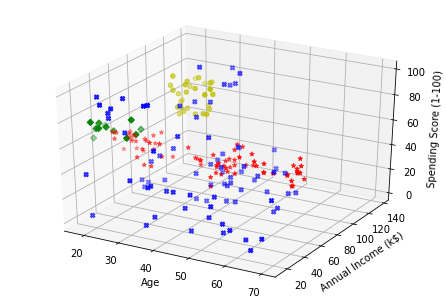

In [15]:
#Visualize Clusters

fig = pyplot.figure()
ax = Axes3D(fig)

df_customer_clust_1 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == -1]
df_customer_clust_2 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 0]
df_customer_clust_3 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 1]
df_customer_clust_4 = df_customer_clust_labels.loc[lambda df_customer_clust_labels: df_customer_clust_labels['cluster_labels'] == 2]

c1 = ax.scatter(df_customer_clust_1['Age'],df_customer_clust_1['Annual Income (k$)'],df_customer_clust_1['Spending Score (1-100)'],marker='X',color='B')
c2 = ax.scatter(df_customer_clust_2['Age'],df_customer_clust_2['Annual Income (k$)'],df_customer_clust_2['Spending Score (1-100)'],marker='D',color='G')
c3 = ax.scatter(df_customer_clust_3['Age'],df_customer_clust_3['Annual Income (k$)'],df_customer_clust_3['Spending Score (1-100)'],marker='*',color='R')
c4 = ax.scatter(df_customer_clust_4['Age'],df_customer_clust_4['Annual Income (k$)'],df_customer_clust_4['Spending Score (1-100)'],color='Y')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

pyplot.show()

In [16]:
#What additional insights can you derive?
#How does DBSCAN compare to K-Means?

#DBSCAN clustering shows some of the same clusters as K-Means (young buyers with high income and young buyers with low income)
#It shows an additional cluster of middle-aged buyers with high income who do not spend a lot of money at the mall
#Note also how the cluster with the largest number of points spans the entire space.
#This cannot happen with k-means due to the geometric segmentation in that algorithm.
#Because DBSCAN uses density and nearness of points, this is possible with DBSCAN and not K-Means.

## Problem 2: Dimensionality Reduction

### Exploratory Data Analysis

Import the Breast Cancer dataset from Sklearn. This dataset has the type of tumor (1=cancerous, 0=benign), as well as many attributes of the tumor. Note that when you import the dataset, it will import as a dictionary of dataframes (using as_frame = True).

In [17]:
#Import sklearn breast cancer data set:
from sklearn.datasets import load_breast_cancer
#Import other data sets
#We will be using pandas, sklearn, matplotlib, numpy, and time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import numpy as np
from sklearn import tree
import time
from sklearn import linear_model

In [18]:
#Convert the breast cancer data from a dictionary into a dataframe.
data_dict=load_breast_cancer(as_frame=True)
df_data=data_dict['data']
df_target = data_dict['target']
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Perform exploratory analysis on the target variable: What are the datatypes for the target series and the dataframe? How many of the data points are cancerous? Etc.

In [19]:
#Find data types of data set and target vector
df_data.dtypes
#The dataset is all floats

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [20]:
#Find the number of cancerous data points
#Performing a summation on the series gives the number of cancerous tumors in the dataset
#We can do this because the target variable is an integer.
df_target.sum()

357

In [21]:
#Percent of data that is cancerous:
df_target.sum()/df_target.size
#There is no major class imbalance problem here.

0.6274165202108963

### Build Classification model
Build a classification model of your choice using Sklearn.
Make sure that you first normalize the dataset.
Make sure that you record: 1) the runtime of the model, and 2) the model accuracy.
This solution will be using a Logistic Regression

In [22]:
#Standardize dataset
scaler = preprocessing.StandardScaler().fit(df_data)
scaled = scaler.transform(df_data)
df_scaled = pd.DataFrame(scaled,columns=df_data.columns)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [23]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_target, test_size=0.33, random_state=42)

In [24]:
#Build a basic logistic regression model (or other classification model)
#Print the training time and accuracy score
clf = linear_model.LogisticRegression(penalty='l2')
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
y_pred = clf.predict(X_test)
y_true = y_test
print(f"Training time: {stop - start}s")
print(f"Accuracy score: {accuracy_score(y_true,y_pred)}")

Training time: 0.0921318531036377s
Accuracy score: 0.9787234042553191


### Perform PCA
Run the PCA algorithm on this dataset:
1) Run the PCA algorithm with n = 2 principal components and determine what percent of the variance of the original dataset is returned by the transformed dataset.
2) Try out a different number of n_components: we are seeking a balance of simplicity and maximal retained variance (Hint: Run a loop over different n_components values).

In [25]:
#Run PCA with n_components = 2 on the dataframe of scaled features
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_components = pd.DataFrame(pca.transform(df_scaled),columns=['PC1','PC2'])
df_components

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [26]:
#Measure the amount of explained variance of this result:
pca.explained_variance_
sum(pca.explained_variance_ratio_*100)

63.24320765155947

In [27]:
#Use PCA to transform the dataframe into a new dataframe that is two principal components. 
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_components = pd.DataFrame(pca.transform(df_scaled),columns=['PC1','PC2'])
df_components['target'] = df_target
df_components

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


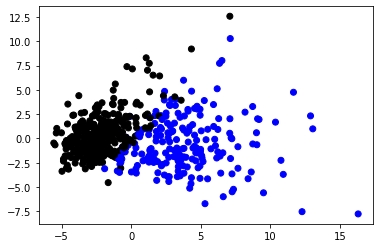

In [28]:
#Use matplotlib to create a scatter plot of the data on these two principal components

#If we were to use only 2 principal components we could easily visualize the data.
col = np.where(df_components['target']==1,'k',np.where(df_components['target']==0,'b','r'))
matplotlib.pyplot.scatter(df_components['PC1'],df_components['PC2'],c=col)

In [29]:
#Run a loop for number of components to determine which number maximizes the dataset's explained variance
num_components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(df_scaled)
    print('Explained variance for {} components: '.format(n),sum(pca.explained_variance_ratio_*100))

Explained variance for 2 components:  63.243207651559416
Explained variance for 3 components:  72.63637090898486
Explained variance for 4 components:  79.2385058244526
Explained variance for 5 components:  84.73427431680406
Explained variance for 6 components:  88.75879635667162
Explained variance for 7 components:  91.0095300692239
Explained variance for 8 components:  92.59825386930137
Explained variance for 9 components:  93.98790324399079
Explained variance for 10 components:  95.15688143356803
Explained variance for 11 components:  96.1366004205631
Explained variance for 12 components:  97.00713832147235
Explained variance for 13 components:  97.81166330785899
Explained variance for 14 components:  98.33502905459734
Explained variance for 15 components:  98.64881227076646


In [30]:
#Re-run PCA on the optimal number of components. Transform the dataframe.
pca = PCA(n_components=7)
pca.fit(df_scaled)
print('Explained variance for {} components: '.format(7),sum(pca.explained_variance_ratio_*100))
df_components = pd.DataFrame(pca.transform(df_scaled),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df_components

Explained variance for 7 components:  91.00953006956608


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159372
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013357
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429910
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082


In [31]:
#We have our new dataset! Note that the new features are not interpretable anymore

### Re-run Classification Model

In [32]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(df_components, df_target, test_size=0.33, random_state=42)

In [33]:
#Basic random forest model
clf = linear_model.LogisticRegression(penalty='l2')
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
y_pred = clf.predict(X_test)
y_true = y_test
print(f"Training time: {stop - start}s")
print(f"Accuracy score: {accuracy_score(y_true,y_pred)}")

Training time: 0.016698122024536133s
Accuracy score: 0.9840425531914894


The training time decreased, and the accuracy increased due to the transformation! While in this case it is a very small difference (and maybe not that important), in more complex models where the training time is significant, PCA can be a very useful tool for reducing computational cost and improving over-fitting.